https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.iirfilter.html

In [31]:
!pip install pyvital vitaldb vital

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [32]:
from matplotlib import pyplot as plt
import matplotlib
import pandas
import numpy as np
from scipy.fftpack import fft

In [33]:
#ekgDF = pandas.read_csv('ekg.csv')

import vitaldb
srate = 100
vals = vitaldb.load_case(10, ['SNUADC/ECG_II','SNUADC/ART'], 1 / srate)
signal = vals[:,0][np.logical_not(np.isnan(vals[:,0]))]
import matplotlib.pyplot as plt
ecg = signal[110000:111000]#vals[110000:111000, 0]
art = vals[110000:111000, 1]

In [34]:
print ('Sampling frequency is: ')
samplingFreq = 100#1/(ekgDF['Time (s)'][22]-ekgDF['Time (s)'][21])
print (samplingFreq)
#ekgDF


Sampling frequency is: 
100


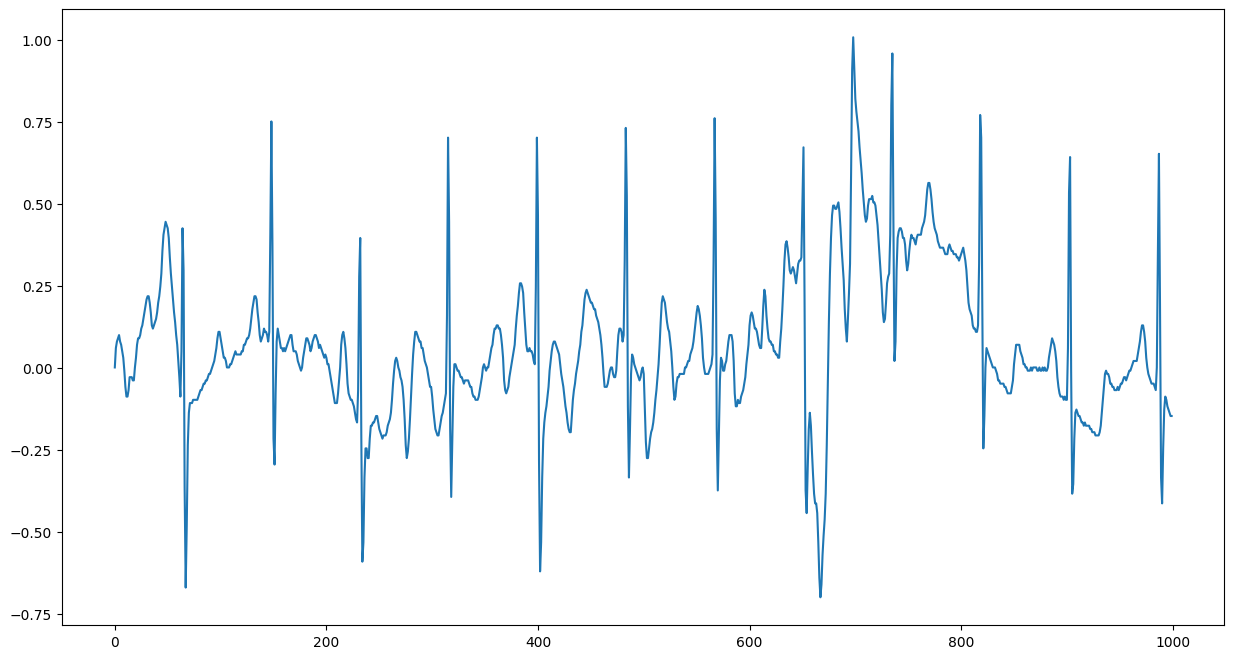

In [35]:
# Time Domain Signal
matplotlib.rc('figure', figsize=(15, 8))
#plt.plot(ekgDF['Time (s)'],ekgDF['Channel 1 (V)'])
plt.plot(ecg)

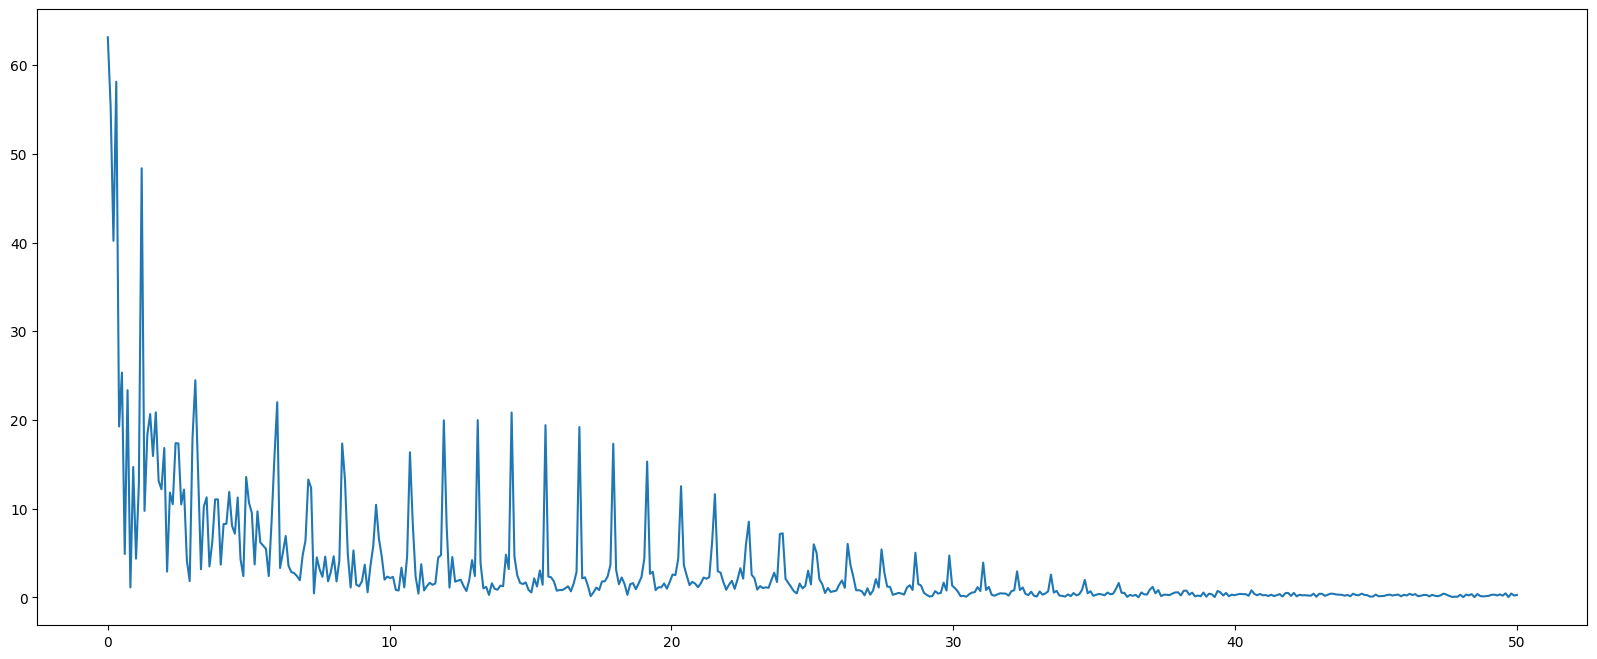

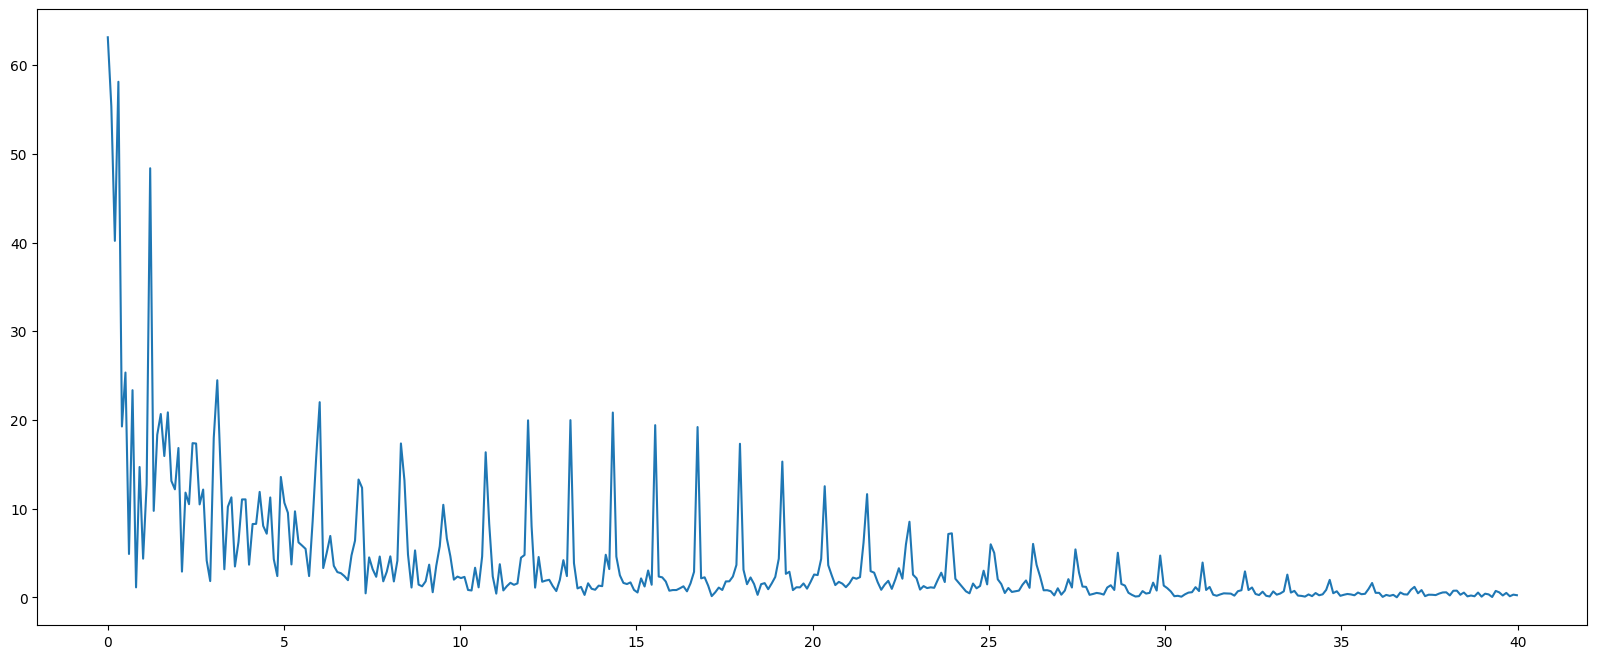

In [36]:
# Frequency Domain
# FFT len is half size of the signal len
# Because of nyquist theorem only half of the sampling frequency can be seen in the sprectrum


ekgData = ecg#ekgDF['Channel 1 (V)'].values
fftData = np.abs( fft(ekgData) )
fftLen = int(len(fftData) / 2)
freqs = np.linspace(0,samplingFreq/2, fftLen )

matplotlib.rc('figure', figsize=(20, 8))

plt.figure()
plt.plot( freqs, fftData[0:fftLen] )
plt.figure()

plt.plot( freqs[0:400], fftData[0:400] )

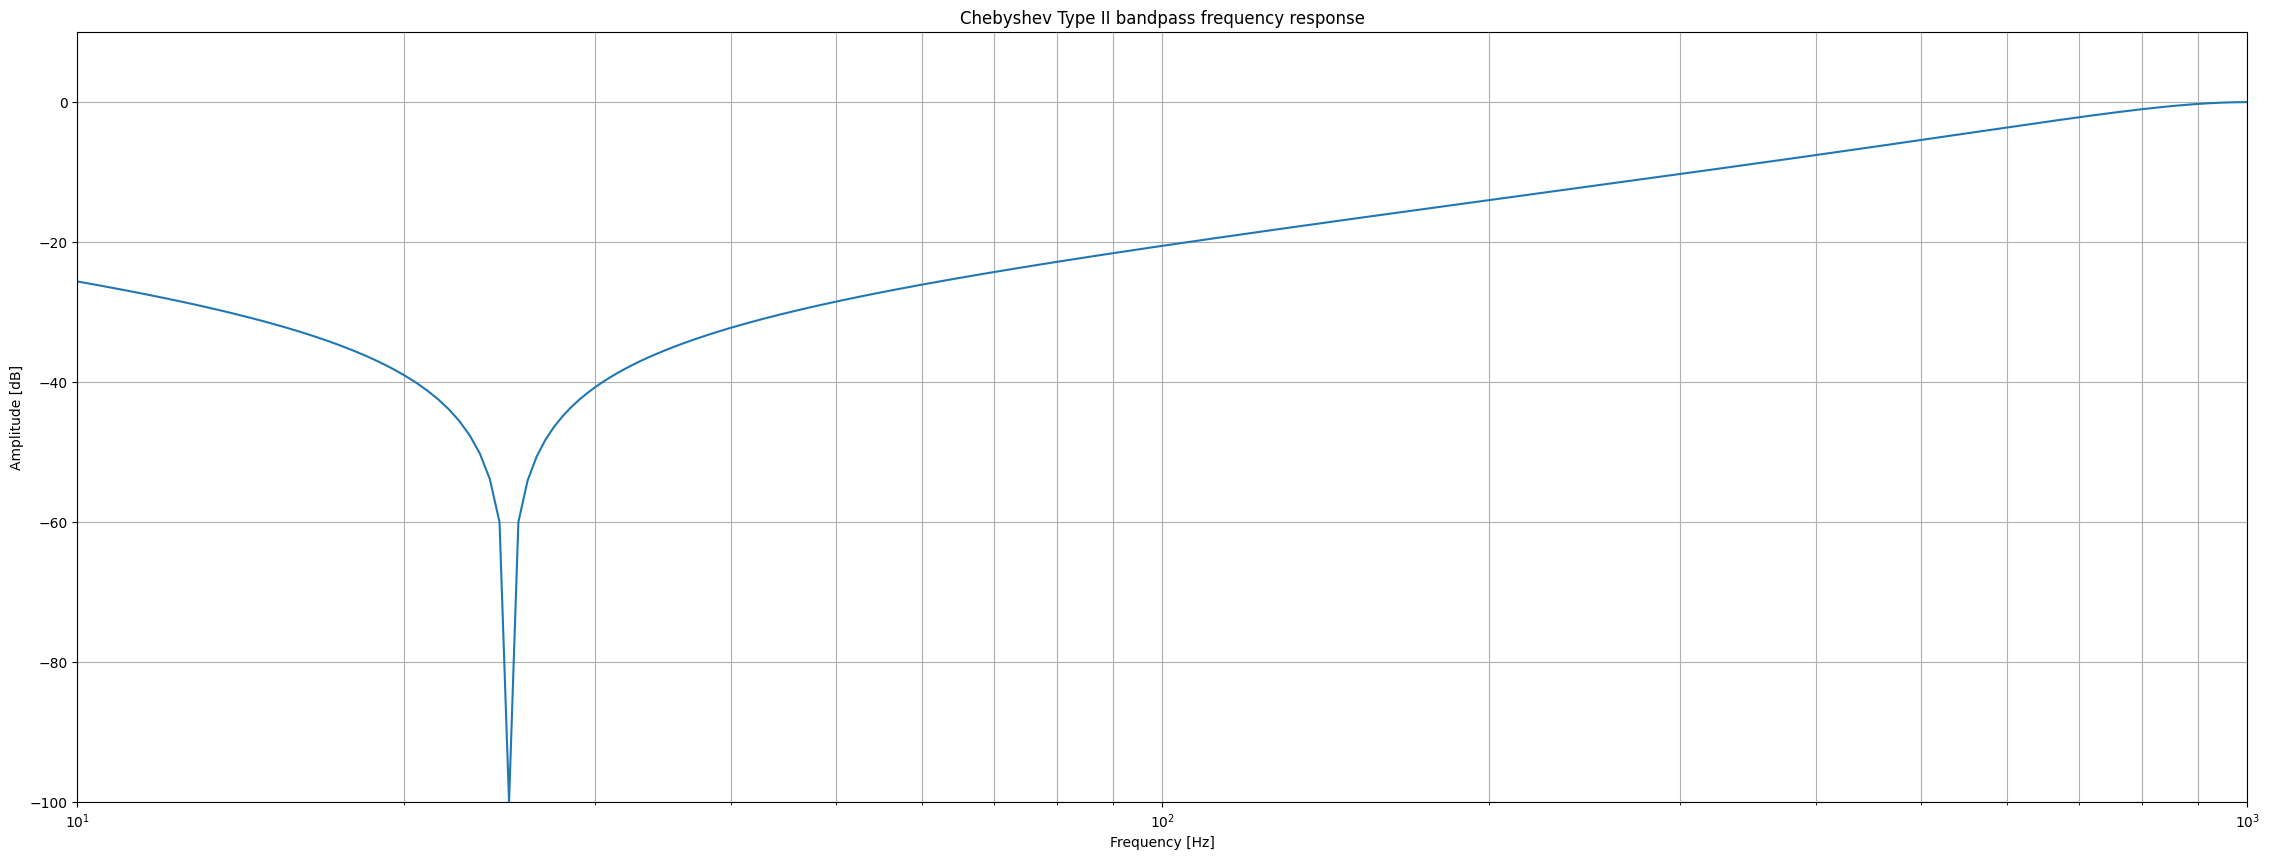

In [60]:

## Design IIR filter
from scipy import signal
sos = signal.iirfilter(1, [49, 51], rs=60, btype='bandstop',
                        analog=False, ftype='cheby2', fs=4000,
                        output='sos')
w, h = signal.sosfreqz(sos, 2000, fs=2000)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.semilogx(w, 20 * np.log10(np.maximum(abs(h), 1e-5)))
ax.set_title('Chebyshev Type II bandpass frequency response')
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('Amplitude [dB]')
ax.axis((10, 1000, -100, 10))
ax.grid(which='both', axis='both')
plt.show()


In [61]:
## filter out 50 Hz noise
ekgFiltered = signal.sosfilt(sos, ekgData)



---



In [ ]:
for i in range(1,15+1):
  print(i)
  sos = signal.iirfilter(i, [49, 51], rs=60, btype='bandstop',
                          analog=False, ftype='cheby2', fs=4000,
                          output='sos')

  ekgFiltered = signal.sosfilt(sos, ekgData)
  plt_sig(ekgFiltered)

In [58]:
def plt_sig(e):
  matplotlib.rc('figure', figsize=(28, 10))
  plt.plot(e)




---



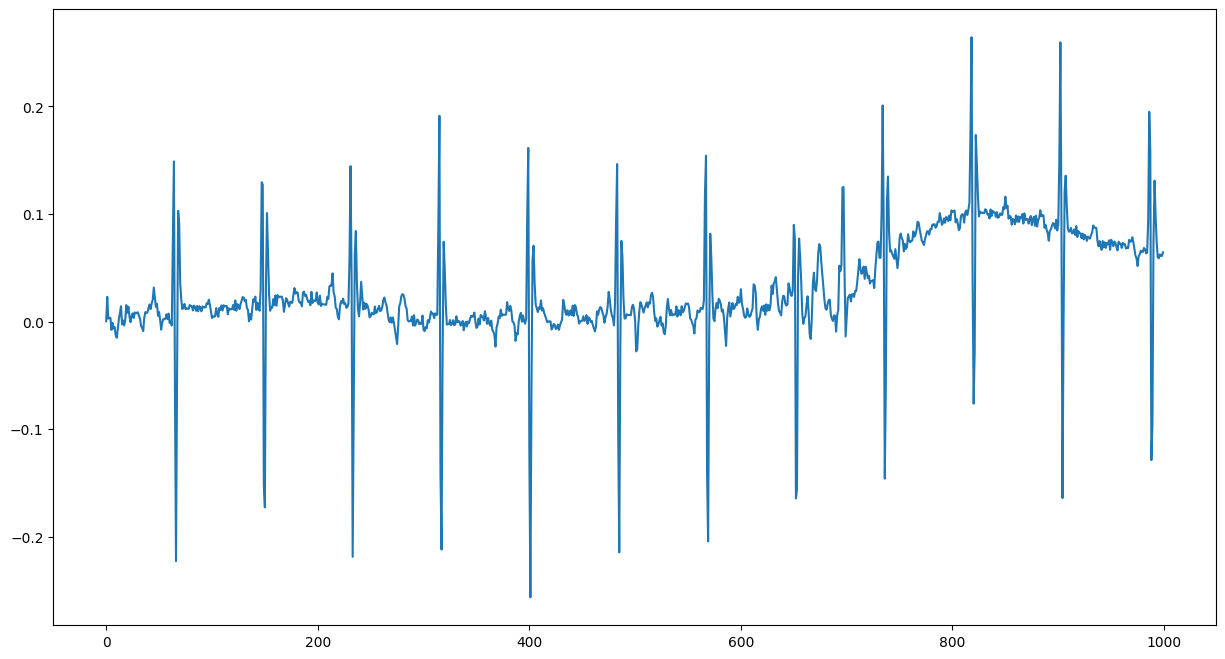

In [62]:
# Time Domain Signal
matplotlib.rc('figure', figsize=(15, 8))
plt.plot(ekgFiltered)

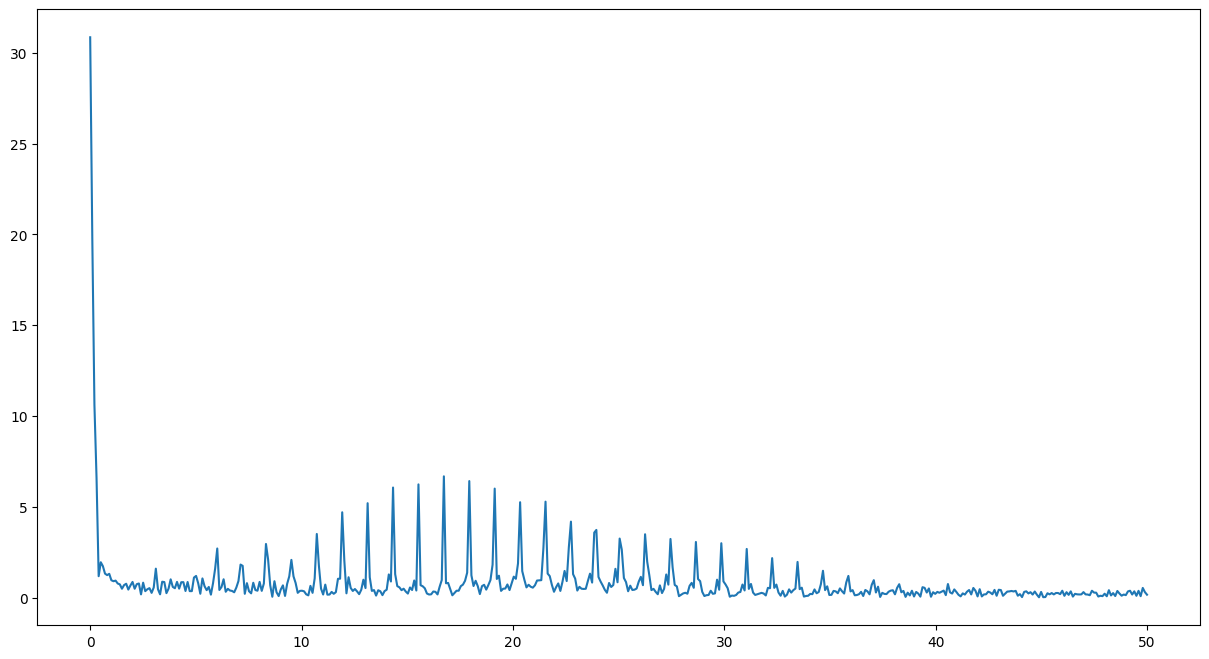

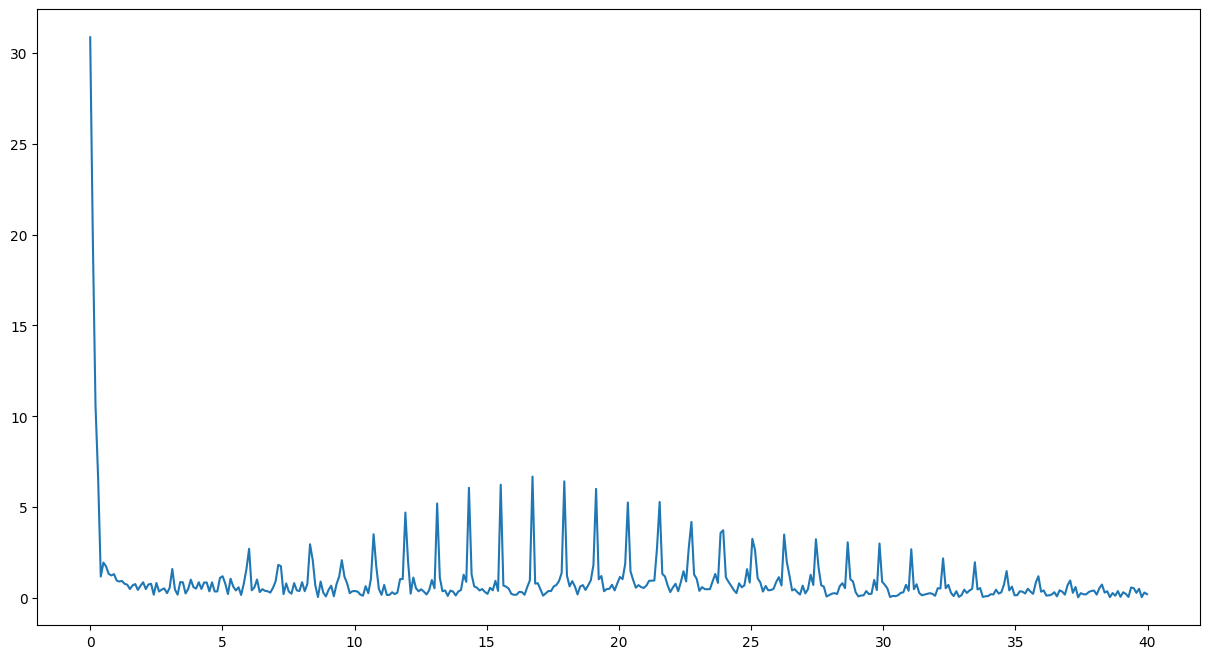

In [63]:
# Frequency Domain
# FFT len is half size of the signal len
# Because of nyquist theorem only half of the sampling frequency can be seen in the sprectrum
fftData = np.abs( fft(ekgFiltered) )
fftLen = int(len(fftData) / 2)
freqs = np.linspace(0,samplingFreq/2, fftLen )

matplotlib.rc('figure', figsize=(15, 8))

plt.figure()
plt.plot( freqs, fftData[0:fftLen] )
plt.figure()

plt.plot( freqs[0:400], fftData[0:400] )

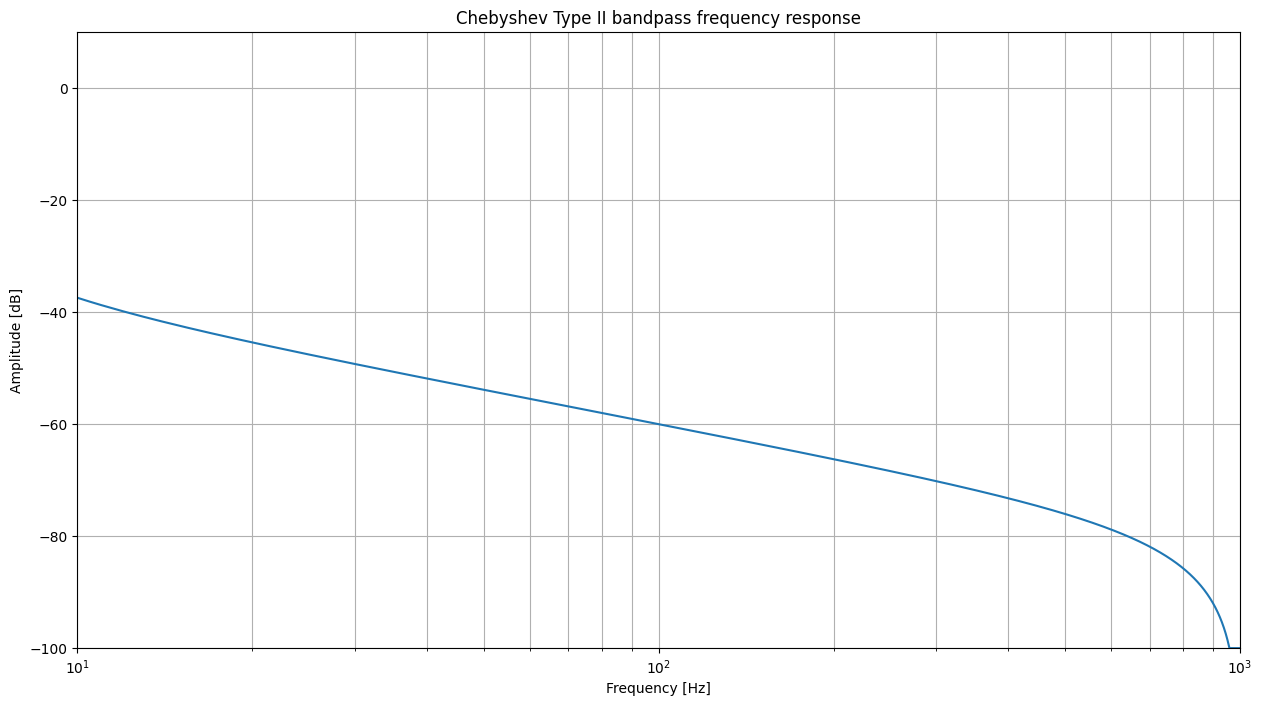

In [64]:
## Design IIR filter
sos2 = signal.iirfilter(1, [0.5, 200], rs=60, btype='bandpass',
                        analog=False, ftype='cheby2', fs=4000,
                        output='sos')
w, h = signal.sosfreqz(sos2, 2000, fs=2000)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.semilogx(w, 20 * np.log10(np.maximum(abs(h), 1e-5)))
ax.set_title('Chebyshev Type II bandpass frequency response')
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('Amplitude [dB]')
ax.axis((10, 1000, -100, 10))
ax.grid(which='both', axis='both')
plt.show()

In [65]:
## filter out 50 Hz noise
ekgFiltered2 = signal.sosfilt(sos2, ekgFiltered)

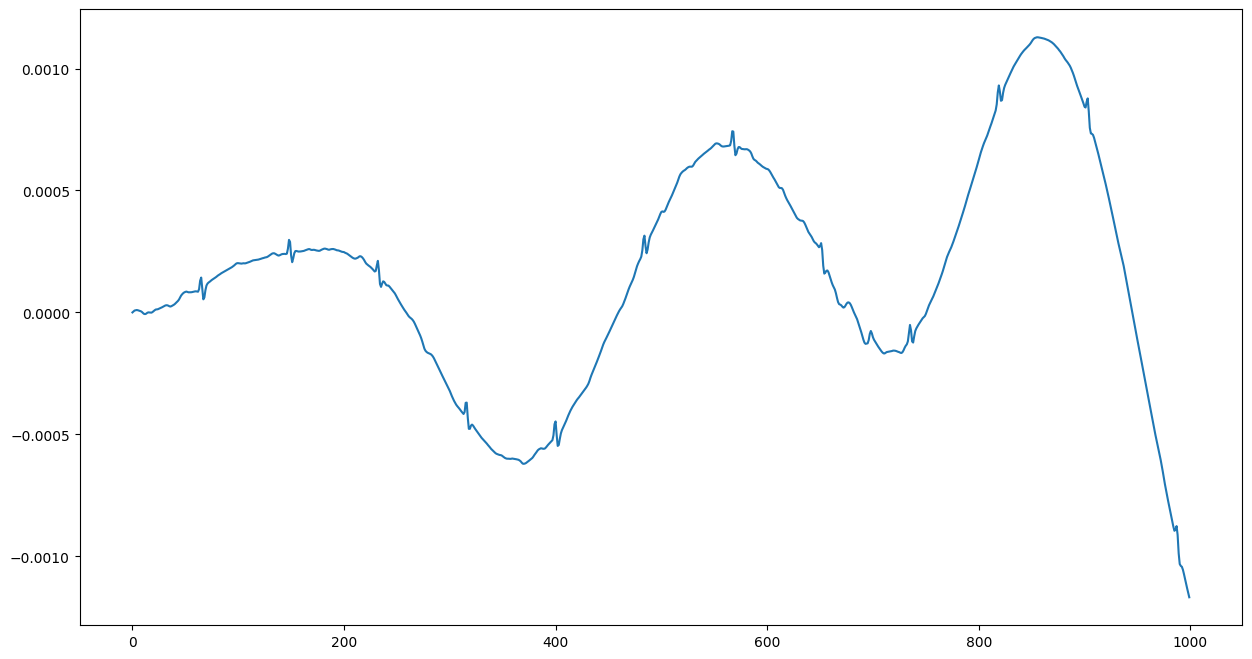

In [66]:
# Time Domain Signal
matplotlib.rc('figure', figsize=(15, 8))
plt.plot(ekgFiltered2)

![](http://www.ni.com/cms/images/devzone/tut/2007-07-09_141618.jpg)